In [1]:
%load_ext autoreload
%autoreload 2
import sys
import glob
import json

import dgl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
from karateclub.graph_embedding.graph2vec import Graph2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from tqdm.notebook import tqdm

sys.path.append("../")
from src.graph2vec import Ensemble_G2V, ExtendedGraph2Vec
from src.utils import *

plt.rcParams["figure.figsize"] = (16, 40)

## Partition graphs

In [2]:
graphs, labels = load_artificial("../datasets/partition_graphs/")

order_dict = np.load("../datasets/partition_graphs/orderings.npy", allow_pickle=True)[
    ()
]

  0%|          | 0/900 [00:00<?, ?it/s]

### Parameters section

In [3]:
subset_card = len(graphs)  # number of graphs

emb_size = 20

cross_val_k = LeaveOneOut()
# number of folds to perform in cross-validation (could be int or LeaveOneOut())

In [4]:
tested_range = np.linspace(0, 1, 11)

WEIGHTING_FUNCTIONS = (
    {f"w_mean_{a:.2f}": ("w_mean", [a]) for a in tested_range}
    | {f"concat": ("concatenate", [])}
    | {f"p_proj_{a}": ("partial_projection", [0, a]) for a in (True, False)}
    | {f"w_proj_{a:.2f}": ("w_projection", [a]) for a in tested_range}
)

### Execution section

In [5]:
graphs_subset = graphs[:subset_card]

base_model = Graph2Vec(dimensions=emb_size)
ens_model = Ensemble_G2V(ExtendedGraph2Vec(dimensions=emb_size), ExtendedGraph2Vec(use_pv_dm=True, dimensions=emb_size))

### F1 score

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

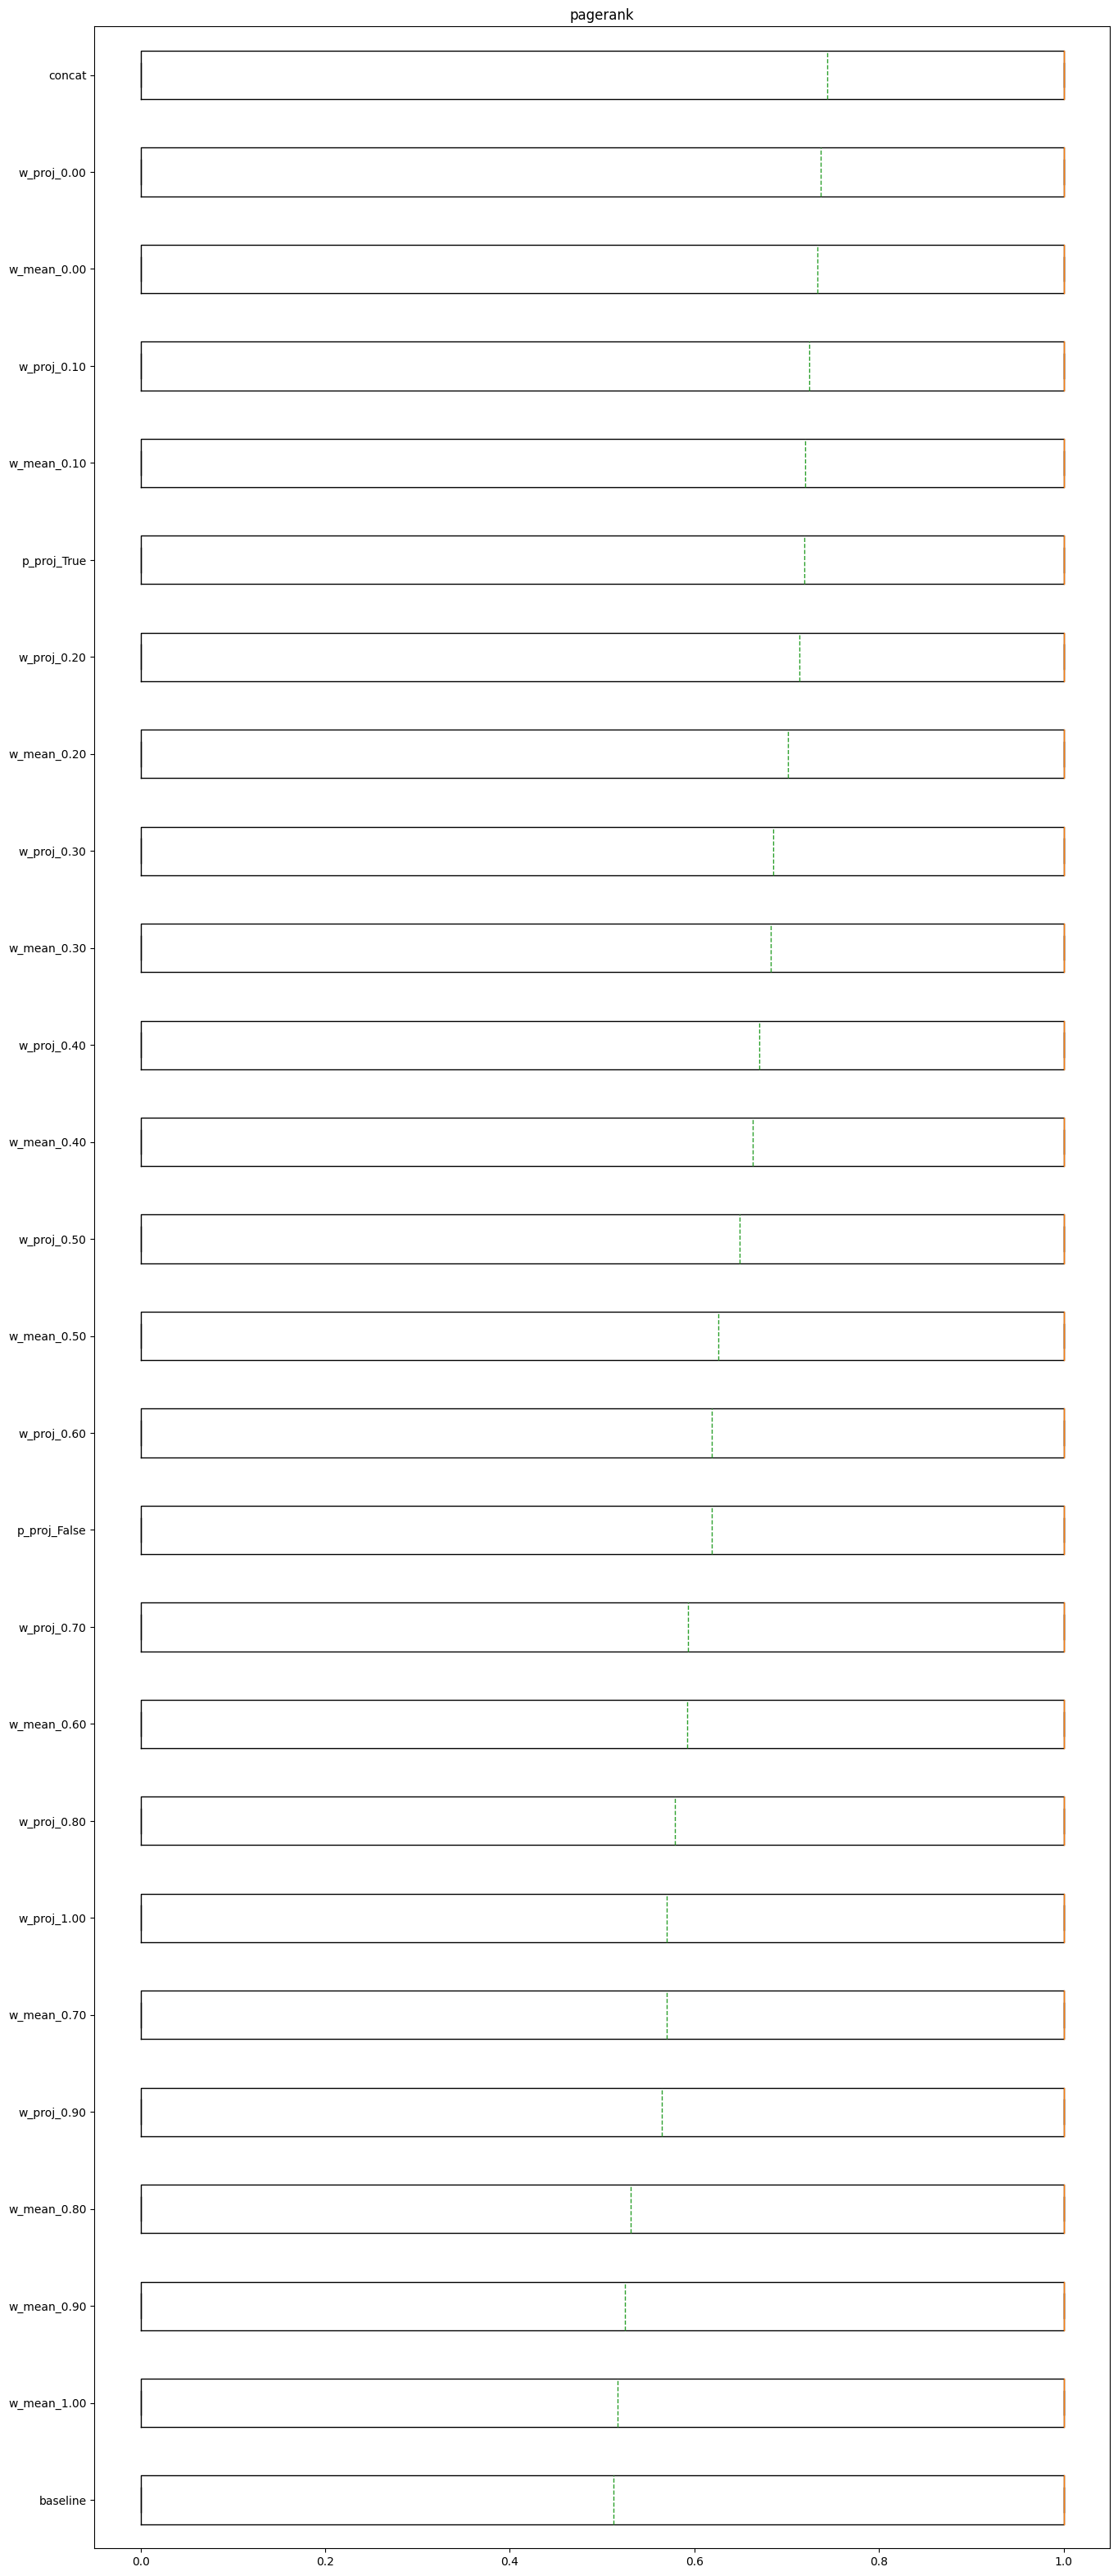

  0%|          | 0/25 [00:00<?, ?it/s]

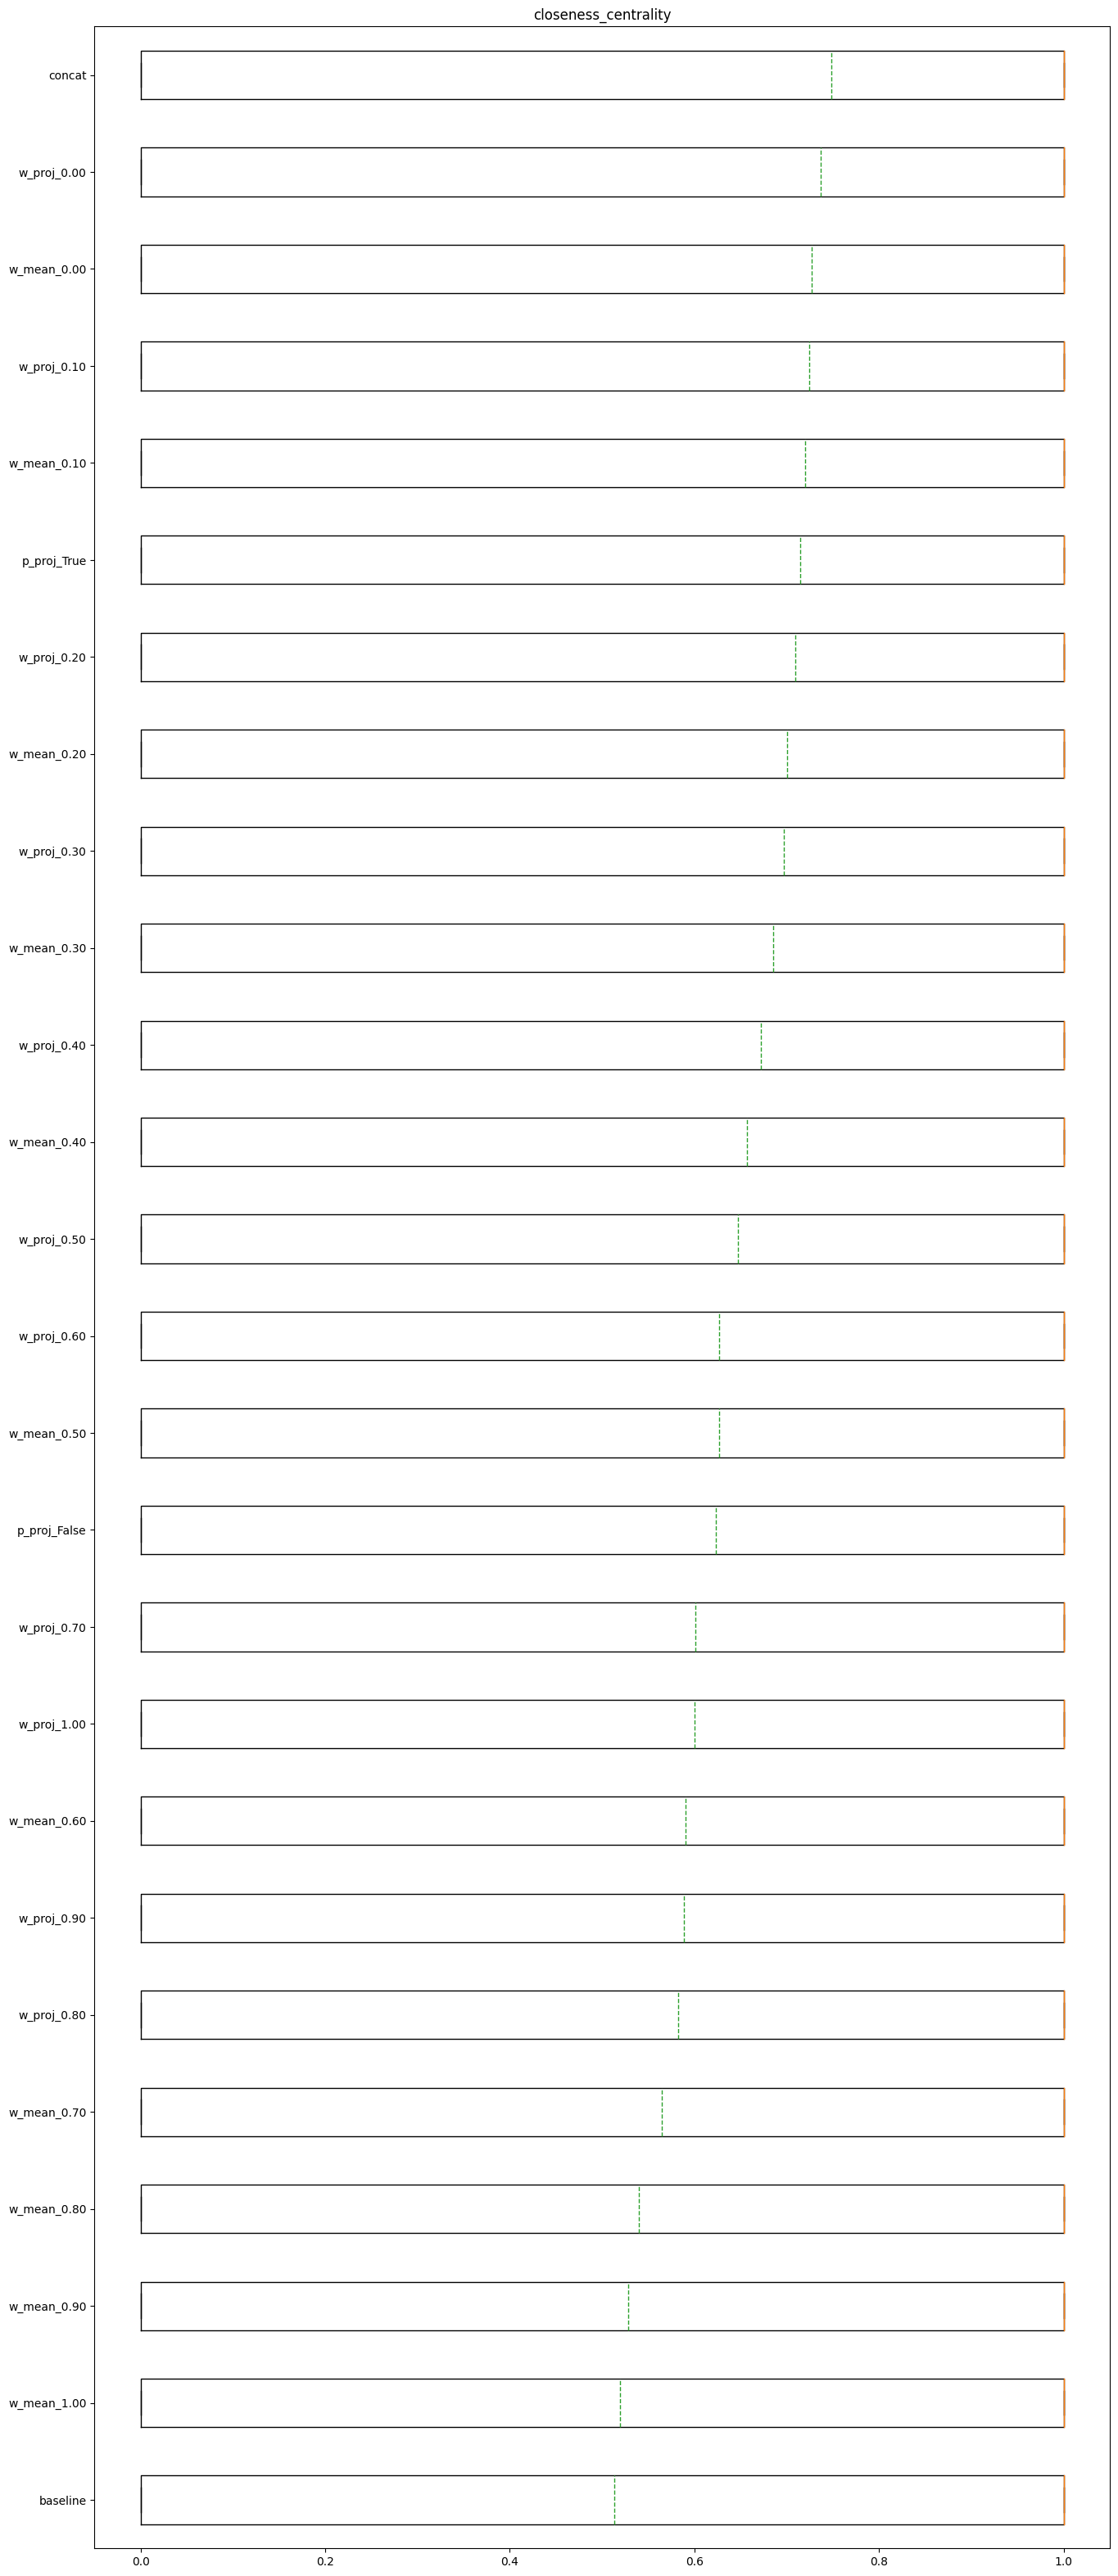

  0%|          | 0/25 [00:00<?, ?it/s]

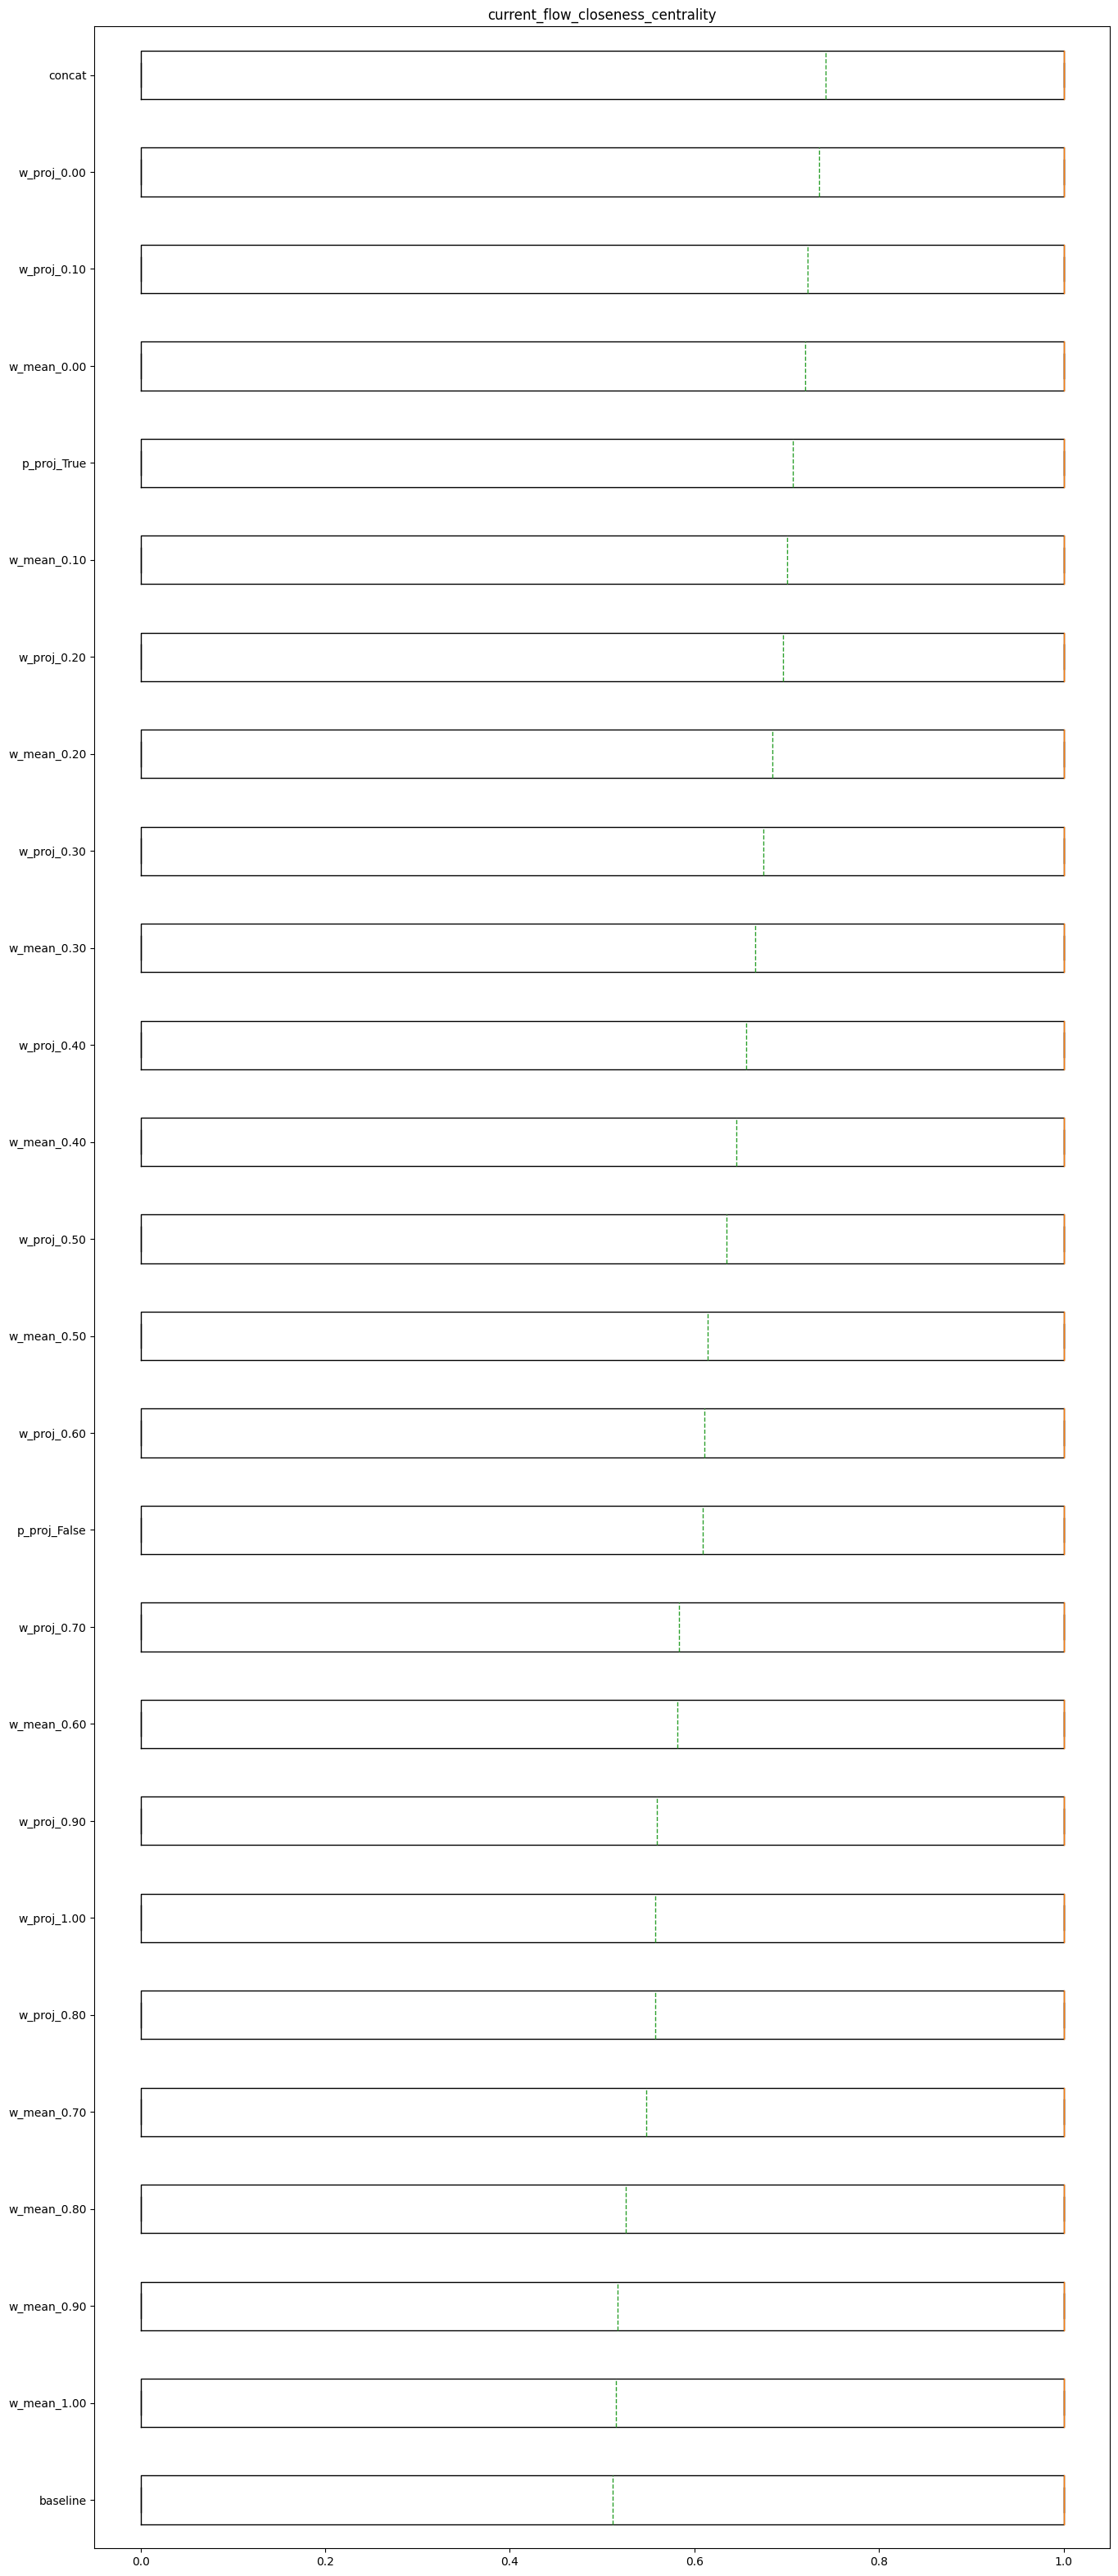

In [6]:
base_model.fit(graphs_subset)
for measure, order in tqdm(order_dict.items()):
    res = {}
    ens_model.fit(graphs_subset, orderings=order)
    res["baseline"] = cross_validate(
        base_model.get_embedding(),
        labels,
        LogisticRegression(max_iter=1000),
        cv=cross_val_k,
        scoring="f1_macro",
    )
    for name, (func, args) in tqdm(WEIGHTING_FUNCTIONS.items(), leave=False):
        ens_model.set_weighting_function(func, *args)
        res[name] = cross_validate(
            ens_model.get_embedding(),
            labels,
            LogisticRegression(max_iter=1000),
            cv=cross_val_k,
            scoring="f1_macro",
        )
    n_items = len(res)
    plt.title(measure)
    plt.boxplot(
        sorted(res.values(), key=lambda x: x.mean()),
        positions=range(n_items),
        vert=False,
        showmeans=True,
        meanline=True,
    )
    plt.yticks(range(n_items), labels=sorted(res.keys(), key=lambda x: res[x].mean()))
    plt.show()

### Accuracy

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

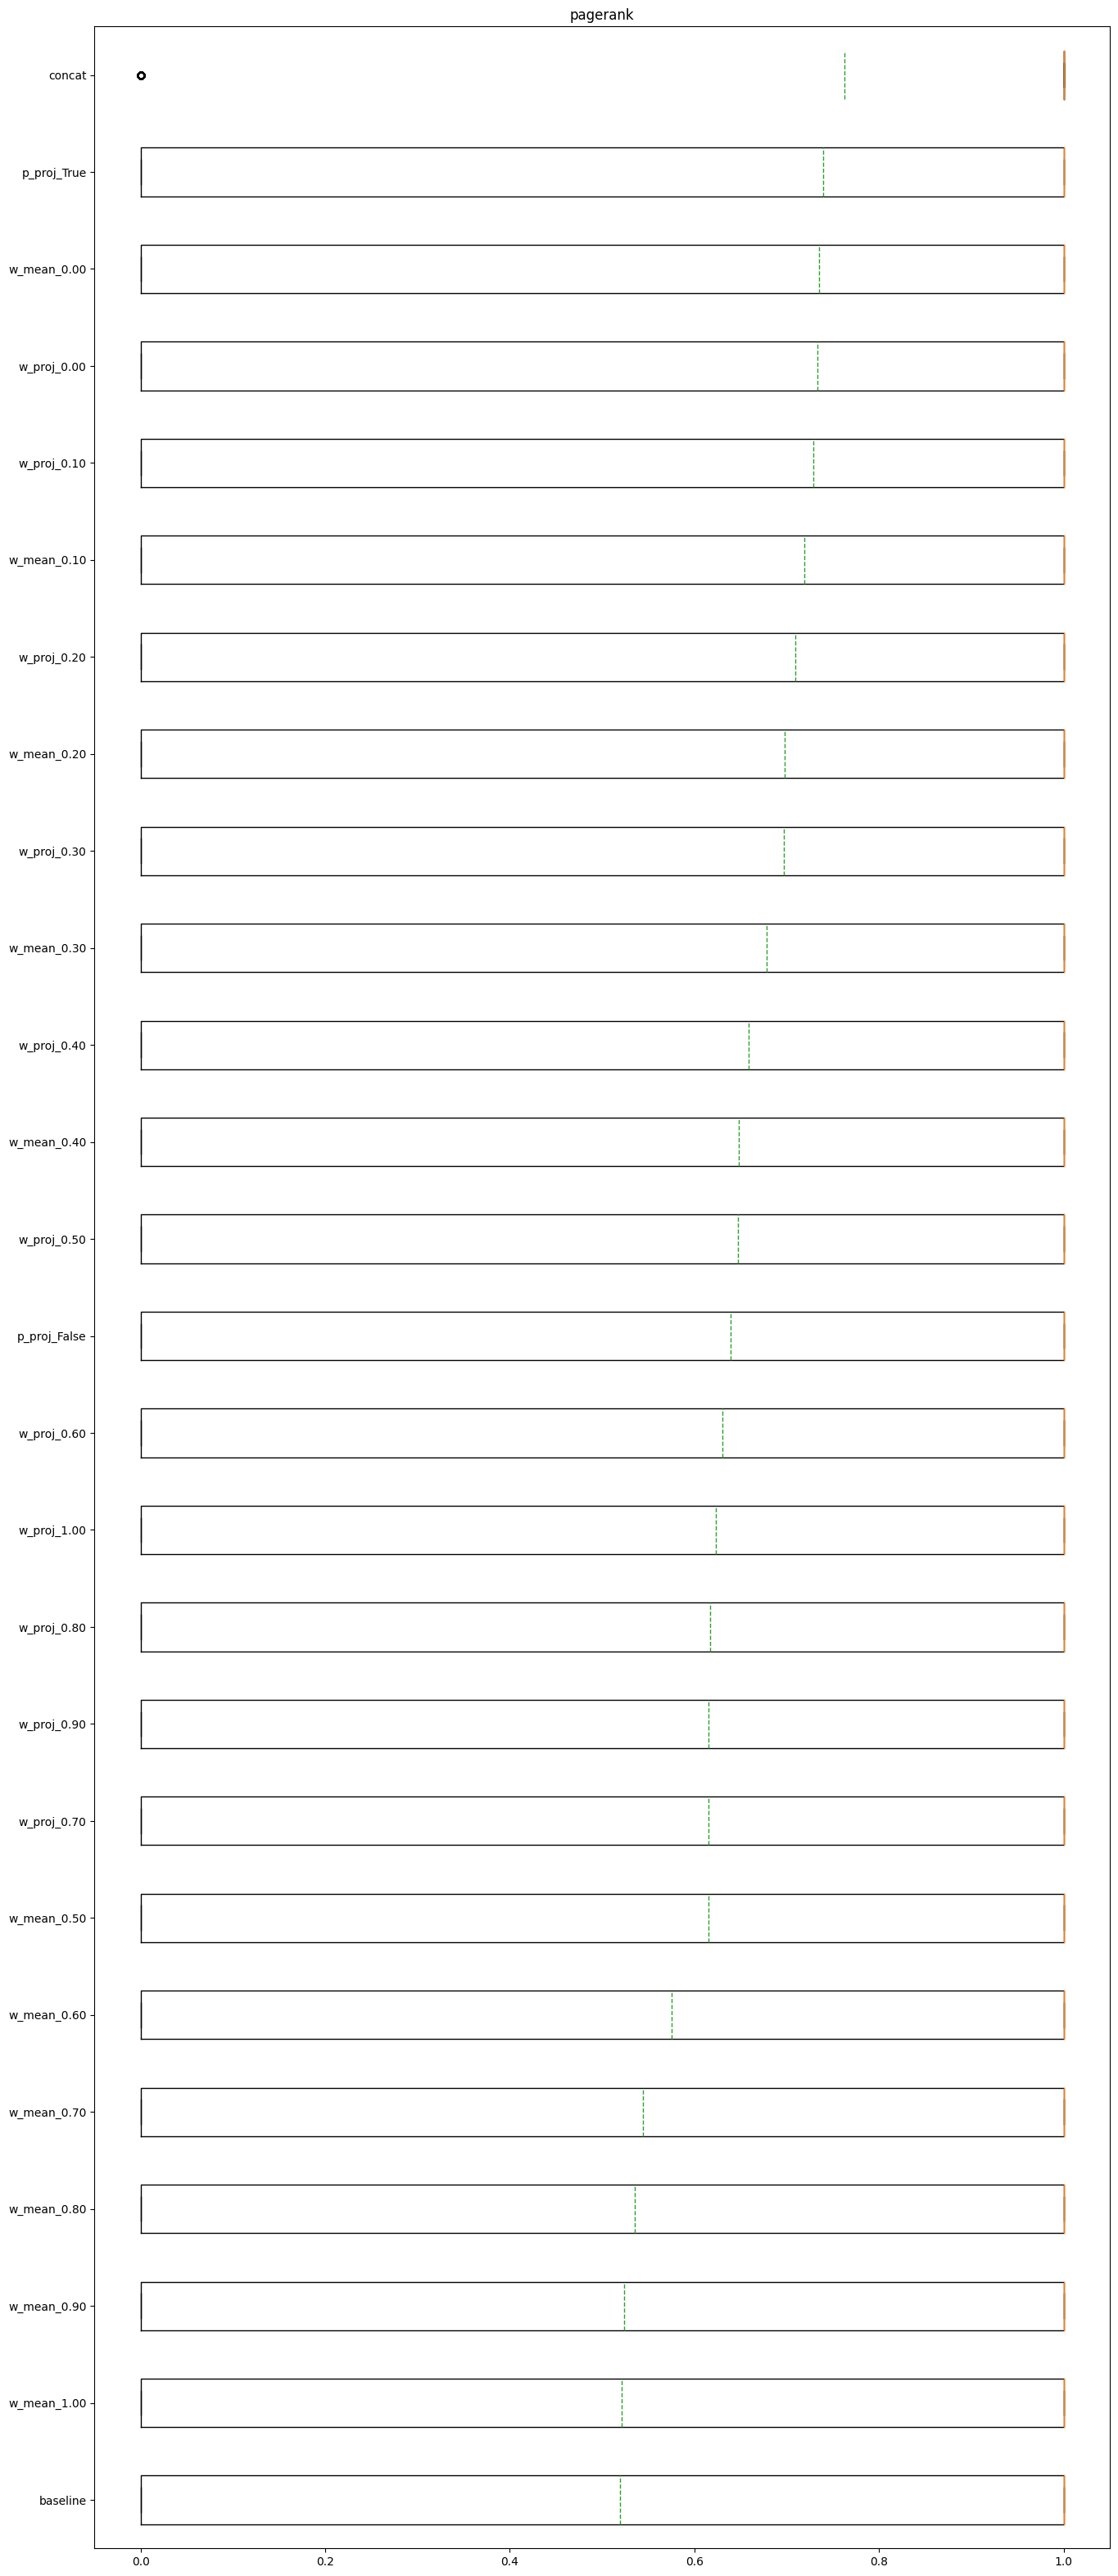

  0%|          | 0/25 [00:00<?, ?it/s]

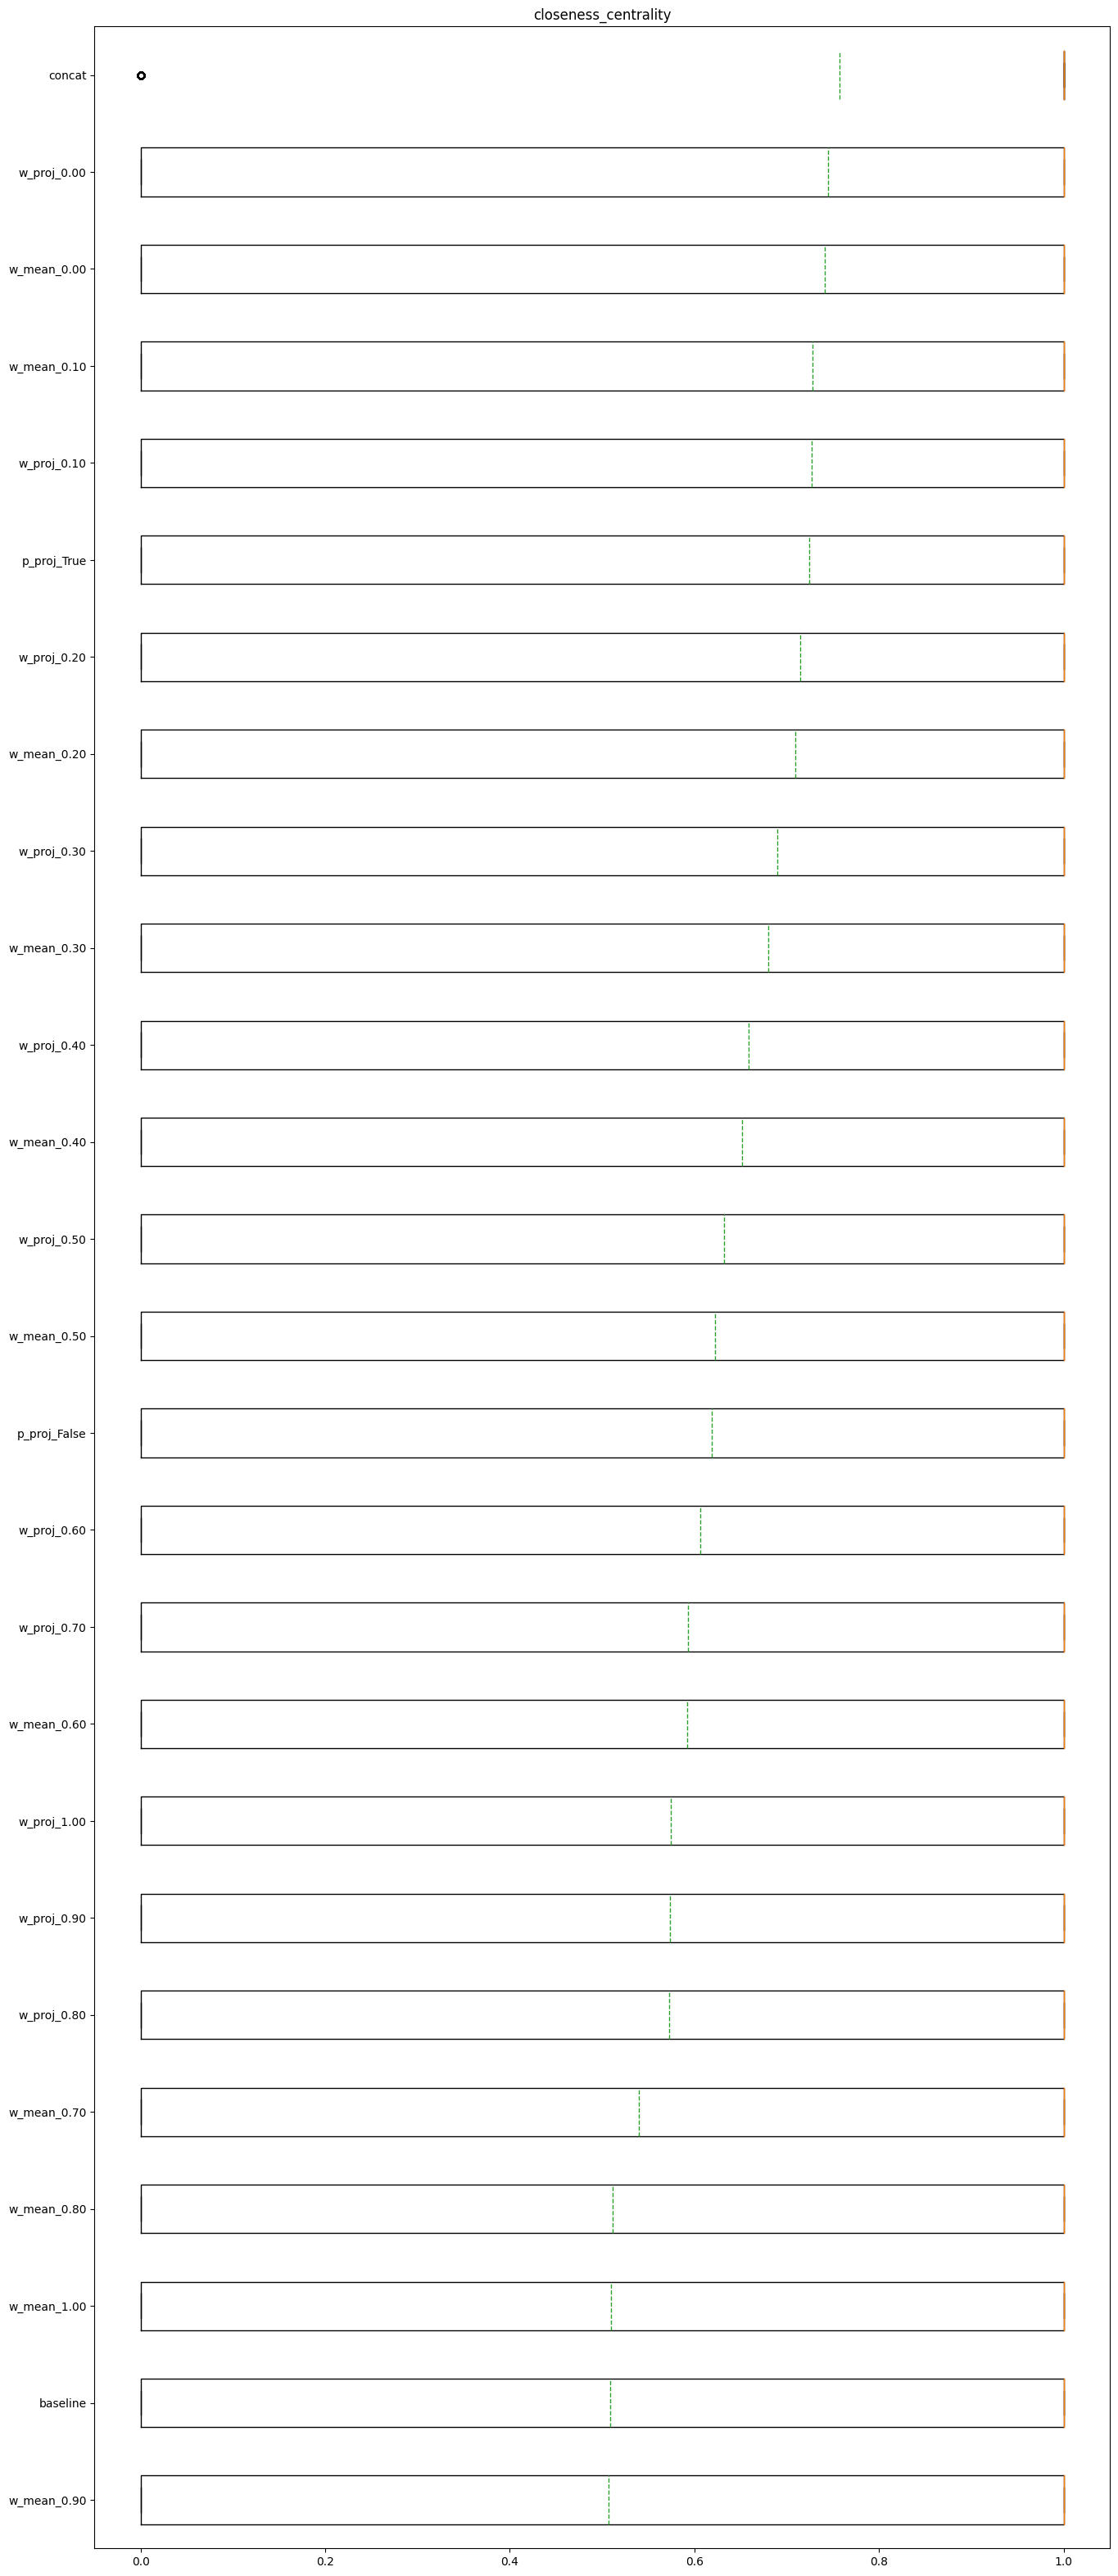

  0%|          | 0/25 [00:00<?, ?it/s]

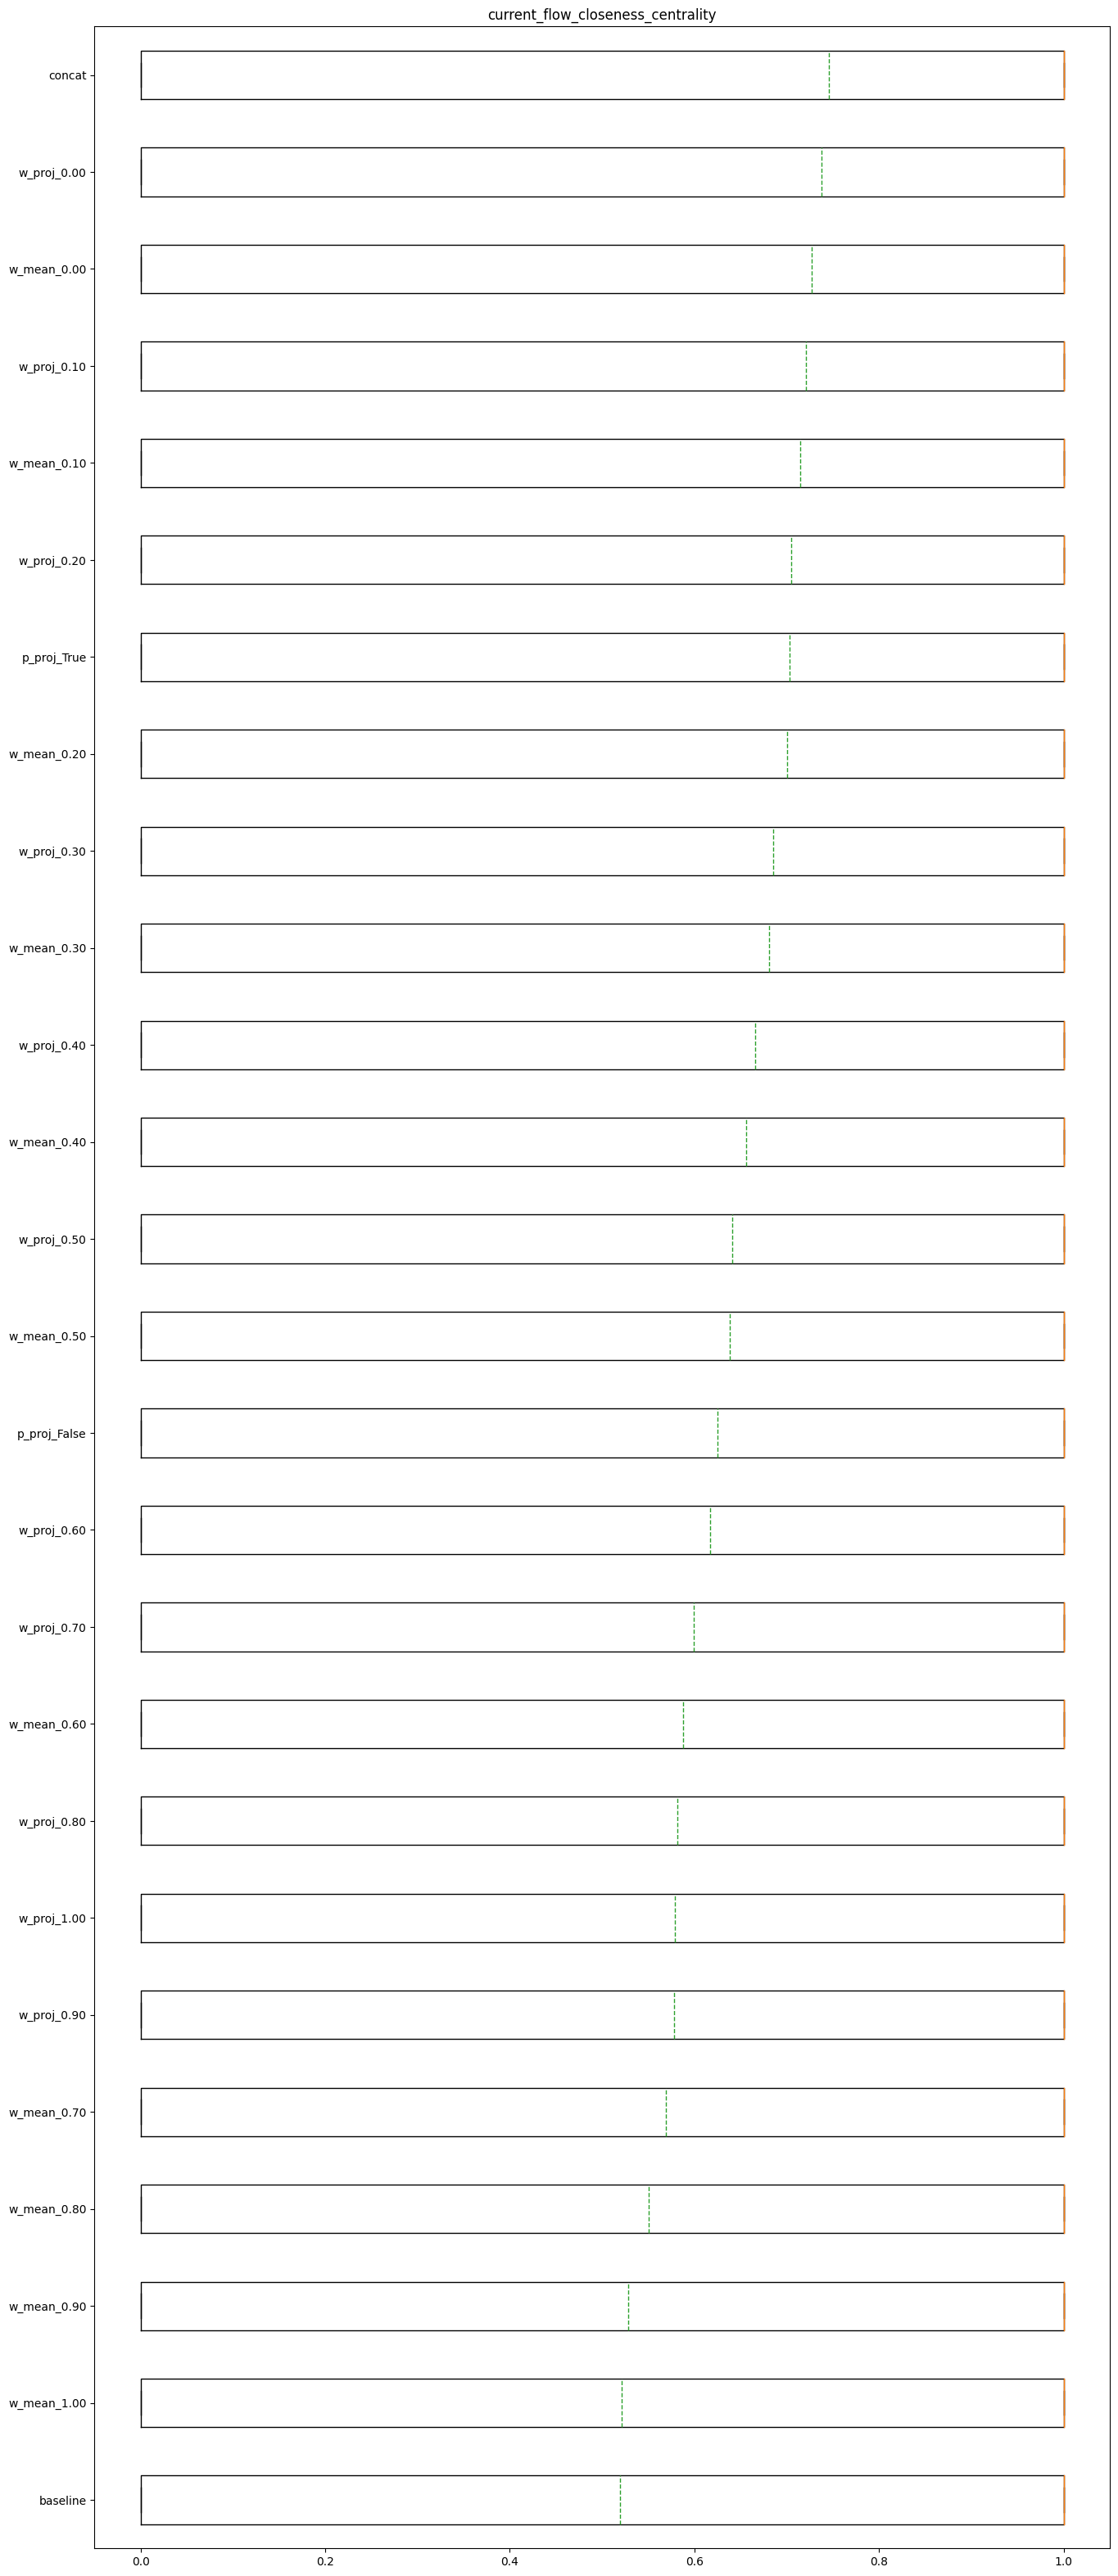

In [7]:
for measure, order in tqdm(order_dict.items()):
    base_model.fit(graphs_subset)
    res = {}
    ens_model.fit(graphs_subset, orderings=order)
    res["baseline"] = cross_validate(
        base_model.get_embedding(),
        labels,
        LogisticRegression(max_iter=1000),
        cv=cross_val_k,
    )
    for name, (func, args) in tqdm(WEIGHTING_FUNCTIONS.items(), leave=False):
        ens_model.set_weighting_function(func, *args)
        res[name] = cross_validate(
            ens_model.get_embedding(),
            labels,
            LogisticRegression(max_iter=1000),
            cv=cross_val_k,
        )
    n_items = len(res)
    plt.title(measure)
    plt.boxplot(
        sorted(res.values(), key=lambda x: x.mean()),
        positions=range(n_items),
        vert=False,
        showmeans=True,
        meanline=True,
    )
    plt.yticks(range(n_items), labels=sorted(res.keys(), key=lambda x: res[x].mean()))
    plt.show()

## Regular graphs

### Parameters section

In [8]:
graphs, labels = load_artificial("../datasets/regular_graphs/")

order_dict = np.load("../datasets/regular_graphs/orderings.npy", allow_pickle=True)[()]

  0%|          | 0/475 [00:00<?, ?it/s]

In [27]:
subset_card = len(graphs)  # number of graphs

emb_size = 2

cross_val_k = LeaveOneOut()
# number of folds to perform in cross-validation (could be int or LeaveOneOut())

In [28]:
tested_range = np.linspace(0, 1, 11)

WEIGHTING_FUNCTIONS = (
    {f"w_mean_{a:.2f}": ("w_mean", [a]) for a in tested_range}
    | {f"concat": ("concatenate", [])}
    | {f"p_proj_{a}": ("partial_projection", [0, a]) for a in (True, False)}
    | {f"w_proj_{a:.2f}": ("w_projection", [a]) for a in tested_range}
)

### Execution section

In [29]:
graphs_subset = graphs[:subset_card]

base_model = Graph2Vec(dimensions=emb_size)
without = ExtendedGraph2Vec(dimensions=emb_size)
with_dm = ExtendedGraph2Vec(dimensions=emb_size)
ens_model = Ensemble_G2V(without, with_dm)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

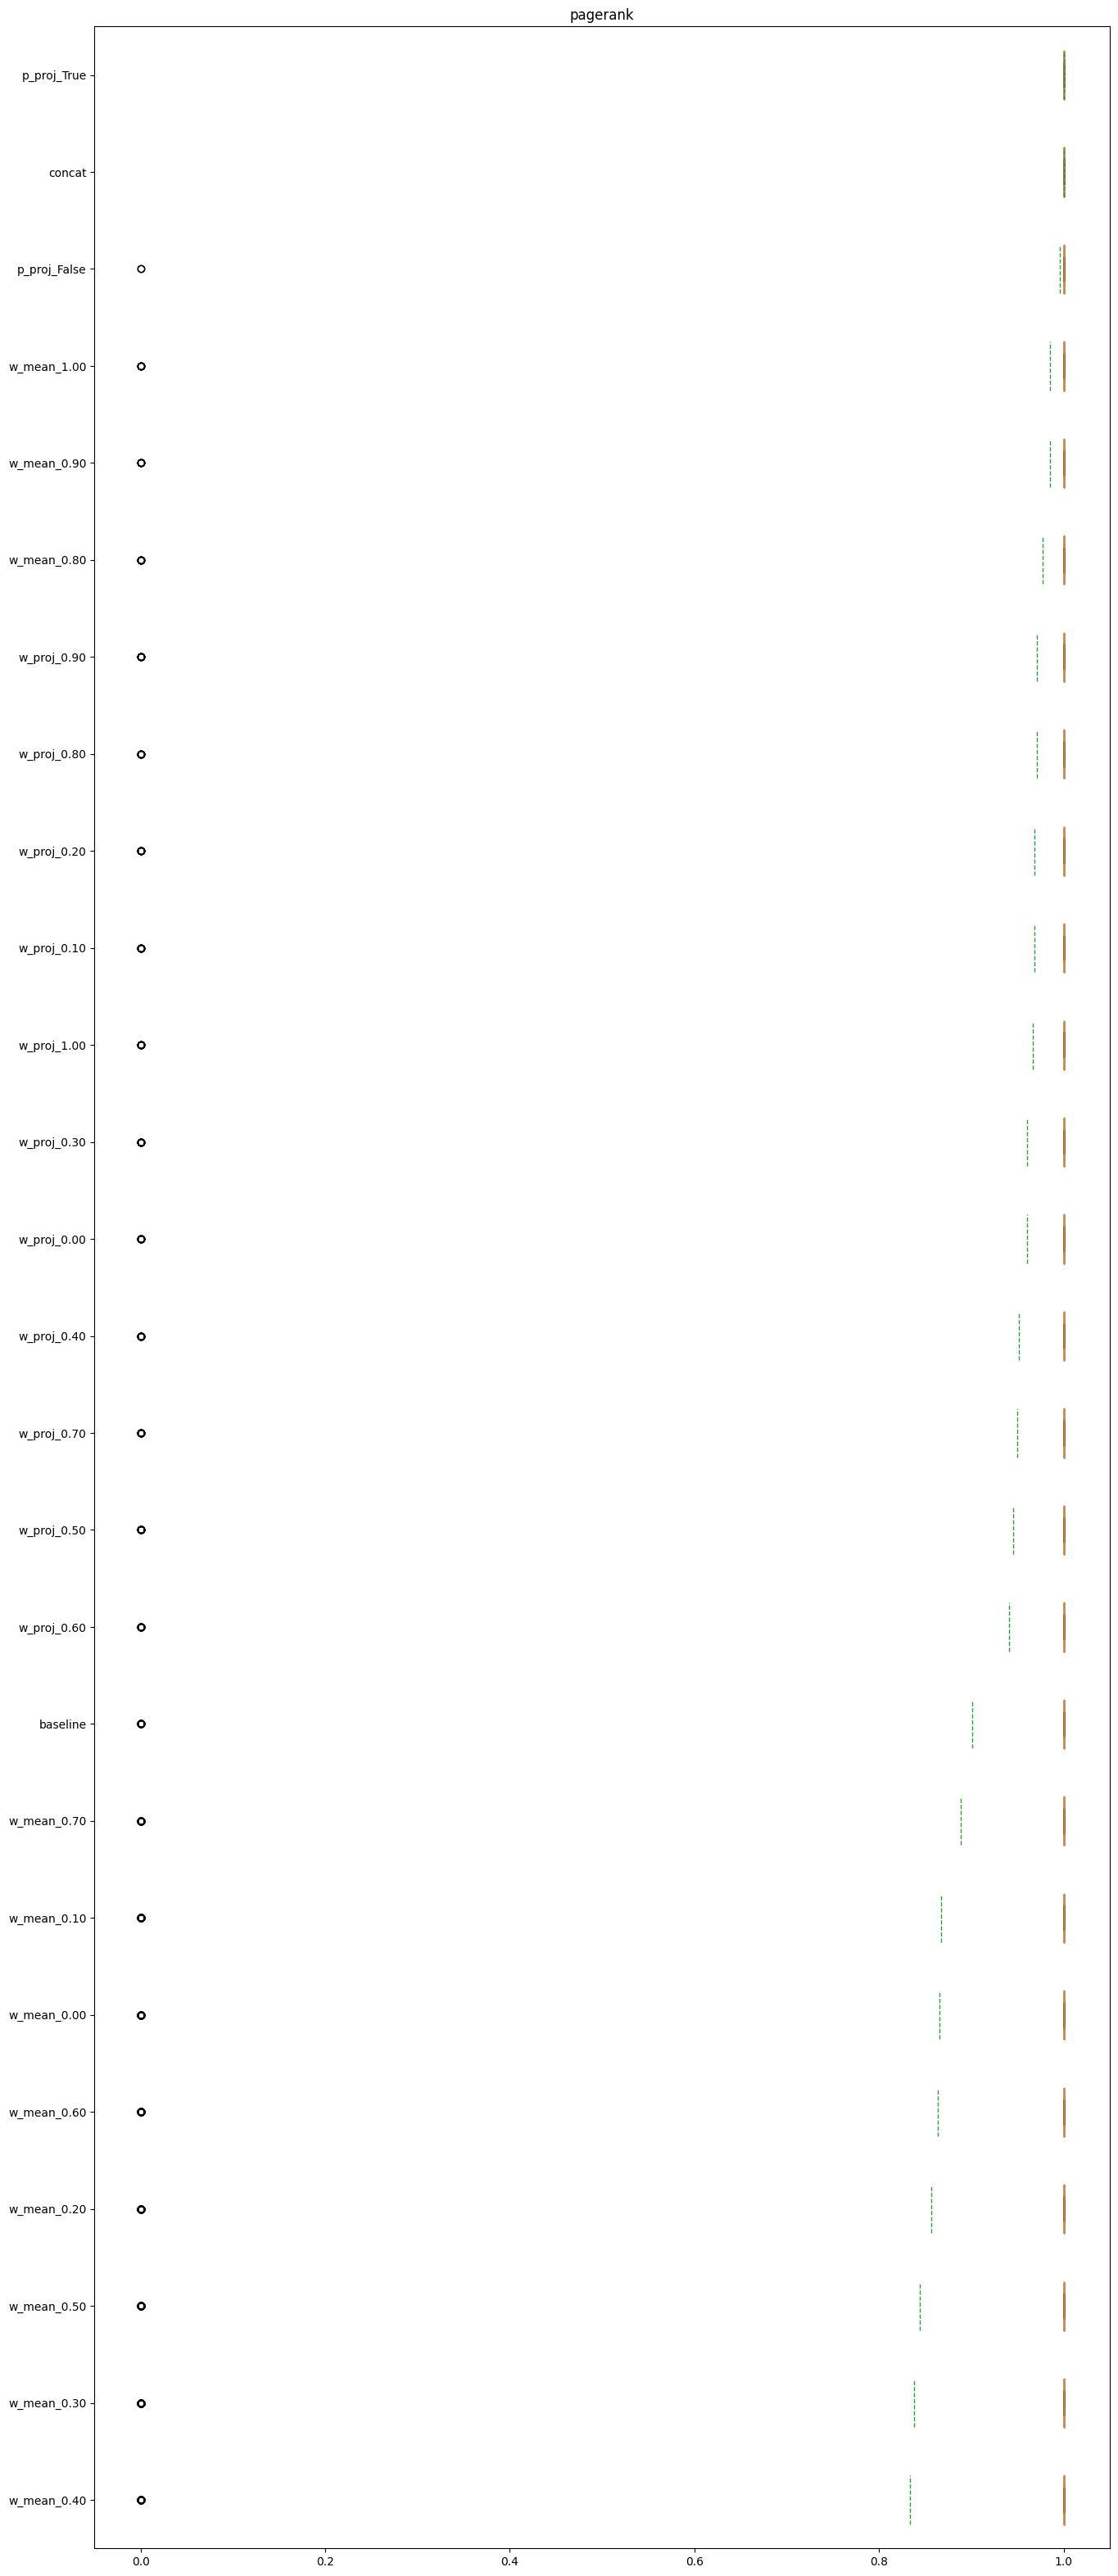

  0%|          | 0/25 [00:00<?, ?it/s]

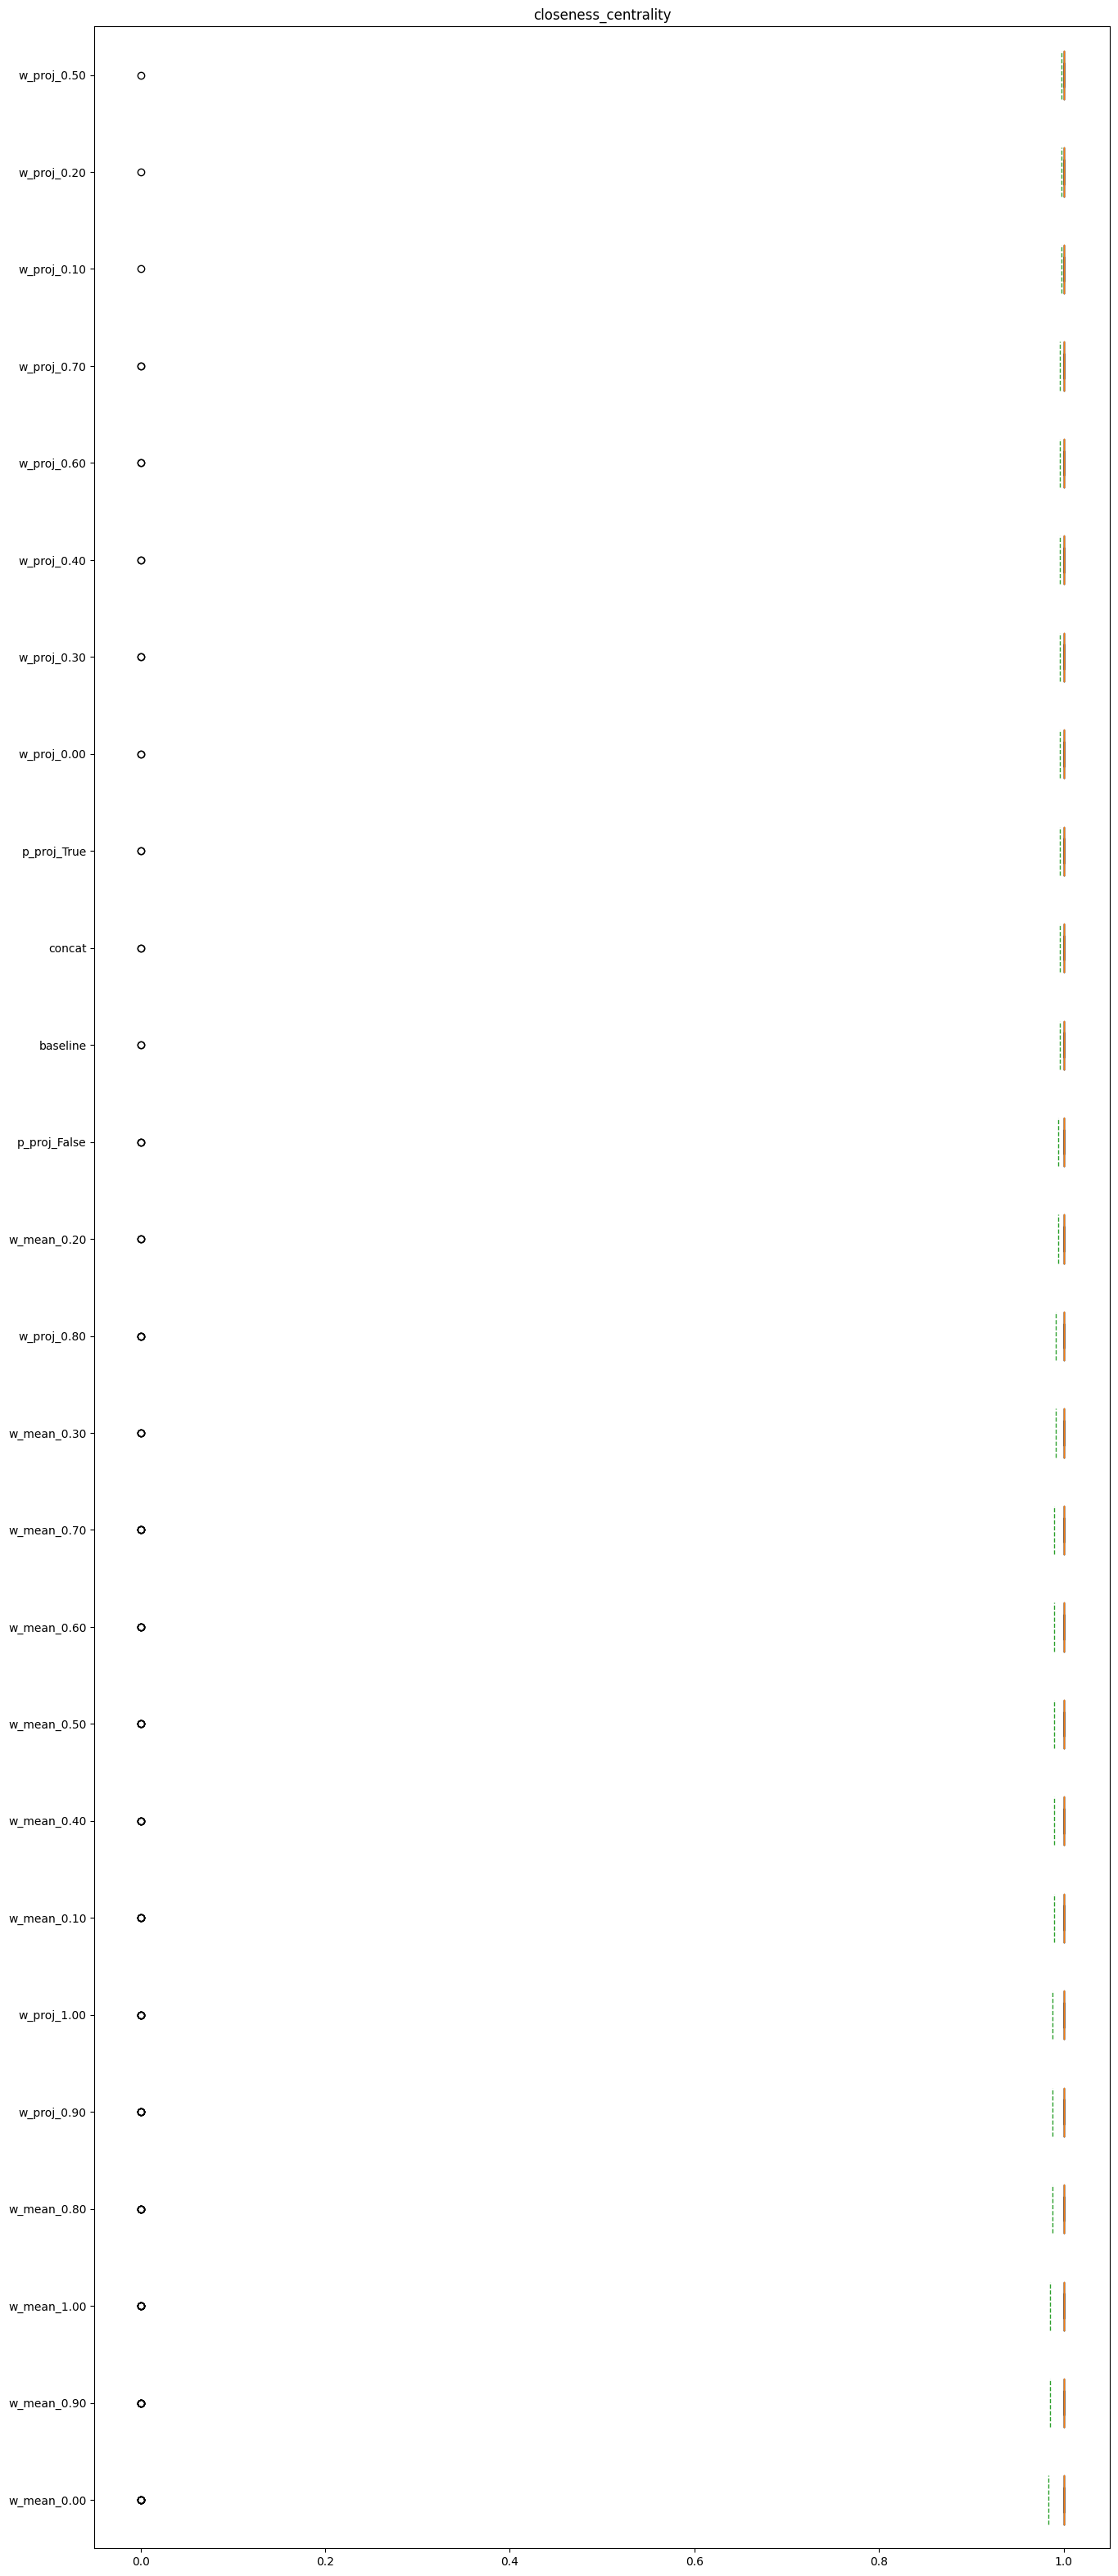

  0%|          | 0/25 [00:00<?, ?it/s]

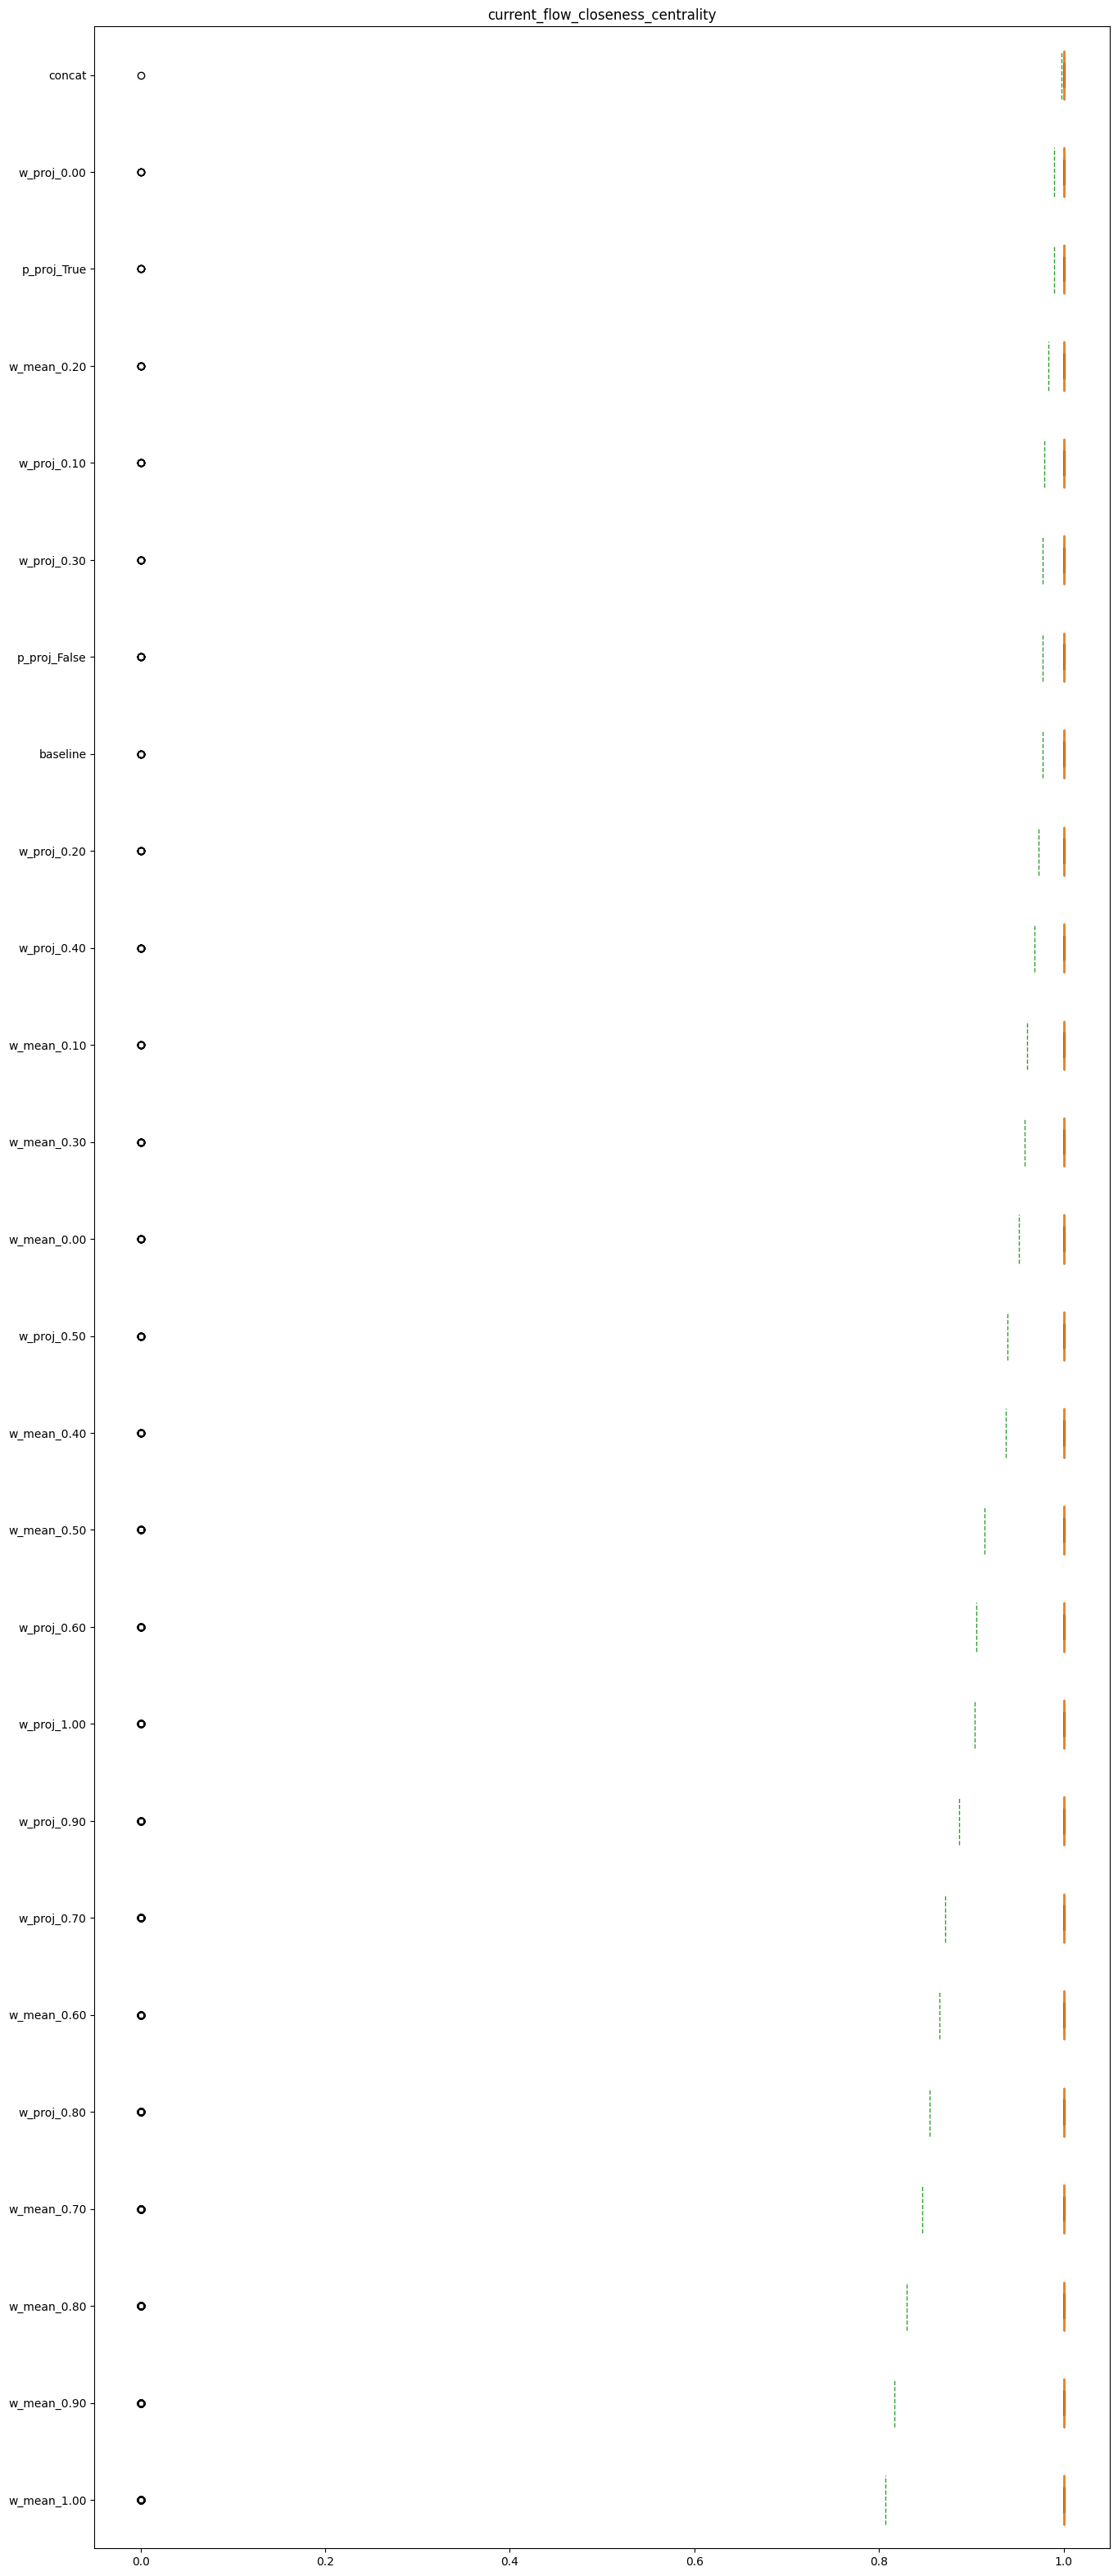

In [30]:
for measure, order in tqdm(order_dict.items()):
    base_model.fit(graphs_subset)
    res = {}
    ens_model.fit(graphs_subset, orderings=order)
    res["baseline"] = cross_validate(
        base_model.get_embedding(),
        labels,
        LogisticRegression(max_iter=1000),
        cv=cross_val_k,
        scoring="f1_macro",
    )
    for name, (func, args) in tqdm(WEIGHTING_FUNCTIONS.items(), leave=False):
        ens_model.set_weighting_function(func, *args)
        res[name] = cross_validate(
            ens_model.get_embedding(),
            labels,
            LogisticRegression(max_iter=1000),
            cv=cross_val_k,
            scoring="f1_macro",
        )
    n_items = len(res)
    plt.title(measure)
    plt.boxplot(
        sorted(res.values(), key=lambda x: x.mean()),
        positions=range(n_items),
        vert=False,
        showmeans=True,
        meanline=True,
    )
    plt.yticks(range(n_items), labels=sorted(res.keys(), key=lambda x: res[x].mean()))
    plt.show()

In [ ]:
for measure, order in tqdm(order_dict.items()):
    base_model.fit(graphs_subset)
    res = {}
    ens_model.fit(graphs_subset, orderings=order)
    res["baseline"] = cross_validate(
        base_model.get_embedding(),
        labels,
        LogisticRegression(max_iter=1000),
        cv=cross_val_k,
    )
    for name, (func, args) in tqdm(WEIGHTING_FUNCTIONS.items(), leave=False):
        ens_model.set_weighting_function(func, *args)
        res[name] = cross_validate(
            ens_model.get_embedding(),
            labels,
            LogisticRegression(max_iter=1000),
            cv=cross_val_k,
        )
    n_items = len(res)
    plt.title(measure)
    plt.boxplot(
        sorted(res.values(), key=lambda x: x.mean()),
        positions=range(n_items),
        vert=False,
        showmeans=True,
        meanline=True,
    )
    plt.yticks(range(n_items), labels=sorted(res.keys(), key=lambda x: res[x].mean()))
    plt.show()